### EDA for Cars24 

- Cars24 is one of the leading used-car buying and selling platform in India.
- eda to estimate the price of the used car

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('..\data\cars24-car-price.csv')
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0
1,Hyundai Grand i10 Asta,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0
2,Hyundai i20 Asta,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0
3,Maruti Alto K10 2010-2014 VXI,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          19980 non-null  object 
 1   selling_price      19980 non-null  float64
 2   year               19980 non-null  float64
 3   seller_type        19980 non-null  object 
 4   km_driven          19980 non-null  int64  
 5   fuel_type          19980 non-null  object 
 6   transmission_type  19980 non-null  object 
 7   mileage            19980 non-null  float64
 8   engine             19980 non-null  float64
 9   max_power          19980 non-null  float64
 10  seats              19980 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.7+ MB


In [4]:
df.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,19980.000000,19980.000000,1.998000e+04,19980.000000,19980.000000,19980.000000,19980.000000
mean,7.392066,2014.525125,5.824488e+04,19.347219,1476.327401,97.854443,5.317868
std,9.103088,3.249185,5.172509e+04,4.620053,520.449398,45.080670,0.835370
min,0.250000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.116425e+04,16.800000,1197.000000,73.900000,5.000000
50%,5.200000,2015.000000,5.200000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.850000,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,5.000000
max,395.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


* selling_price [0.250000 to 395.000000] lakhs, there are outliers, check needs to be performed
* mileage - 0 to 120 (outliers?) , mean - 19.34


### Distributions

In [5]:
def plotDistributions(dataframe, featureName):
    plt.figure(figsize=(8,2.5), tight_layout=True)
    plt.subplot(1,2,1)
    sns.kdeplot(x=featureName, data=dataframe)
    plt.subplot(1,2,2)
    sns.boxplot(x=featureName, data=dataframe)

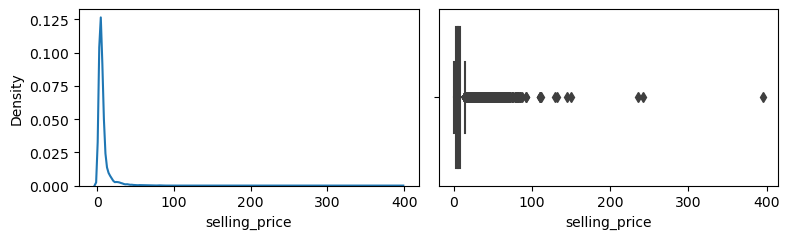

In [6]:
plotDistributions(df, 'selling_price')


* looks like after 100 price outliers are there but by what percentage ?

In [7]:
# percentage of outliers for selling price = 0.06 %
np.round((len(df[df.selling_price>100]['selling_price']) / len(df)) * 100, 2)

0.06

In [8]:
# cut the data upto 100
df.loc[df.selling_price > 100, 'selling_price'] = 100

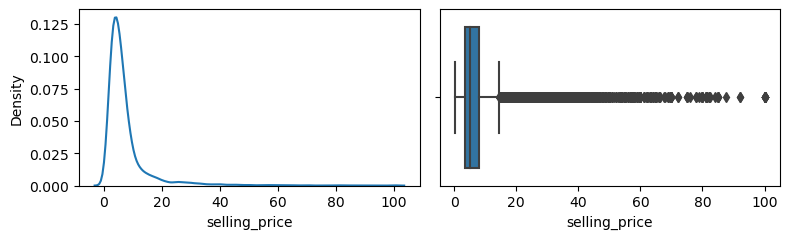

In [9]:
plotDistributions(df, 'selling_price')

### for milage 

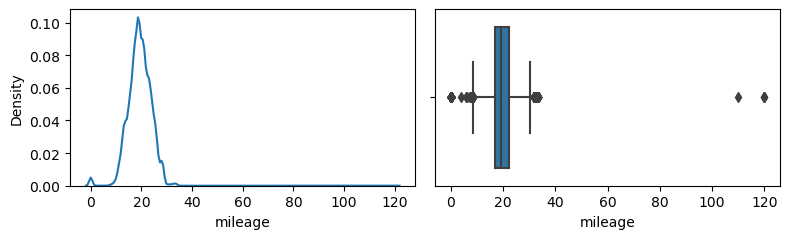

In [10]:
plotDistributions(df, 'mileage')

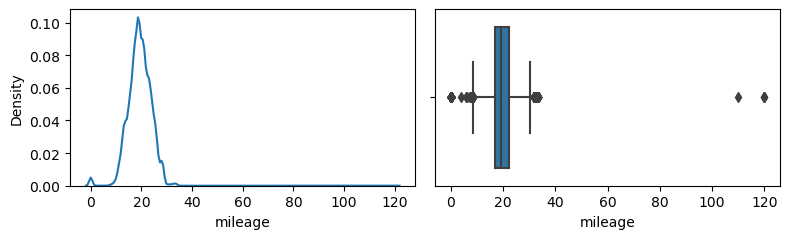

In [11]:
plotDistributions(df, 'mileage')

In [12]:
df[df.mileage <= 5].mileage.describe()

count    161.000000
mean       0.024845
std        0.315244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: mileage, dtype: float64

In [13]:
np.round(len(df[df.mileage == 0])/len(df)*100,2)  # 0.8%

0.8

In [14]:
# if the milage = 0 , then we can safely delete the data as it is very small 

In [15]:
## for milage > 40

In [16]:
df[df.mileage > 40] 

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
11966,Mahindra e2oPlus P6,4.00,2018.0,Dealer,26000,Electric,Automatic,110.0,1476.327401,25.4,4.0
15684,Mahindra e2o T2,3.60,2015.0,Dealer,42862,Electric,Automatic,120.0,0.000000,25.5,5.0
17782,Mahindra e2o T2,4.50,2015.0,Dealer,40000,Electric,Automatic,120.0,0.000000,25.5,5.0
18401,Mahindra e2o Premium,3.25,2013.0,Individual,50000,Electric,Automatic,120.0,0.000000,25.5,5.0


In [17]:
## Electric cars have milage >= 40 

## Correlations

In [18]:
df_numeric = df.select_dtypes(include='number')
df_numeric.head()

,selling_price,year,km_driven,mileage,engine,max_power,seats
0,1.20,2012.0,120000,19.70,796.0,46.30,5.0
1,5.50,2016.0,20000,18.90,1197.0,82.00,5.0
2,2.15,2010.0,60000,17.00,1197.0,80.00,5.0
3,2.26,2012.0,37000,20.92,998.0,67.10,5.0
4,5.70,2015.0,30000,22.77,1498.0,98.59,5.0


<Axes: >

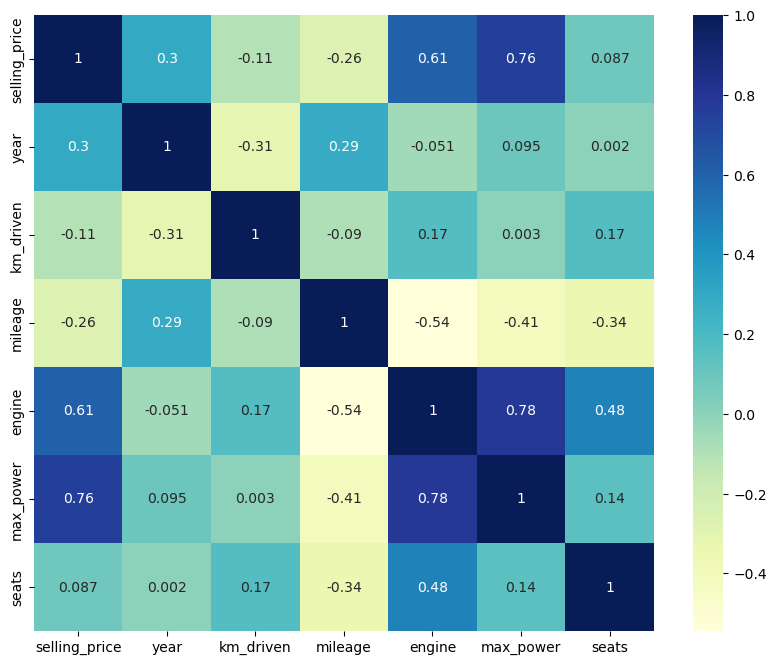

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='YlGnBu')

* Selling price is correlated with engine and max_power

C:\Users\Upendra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

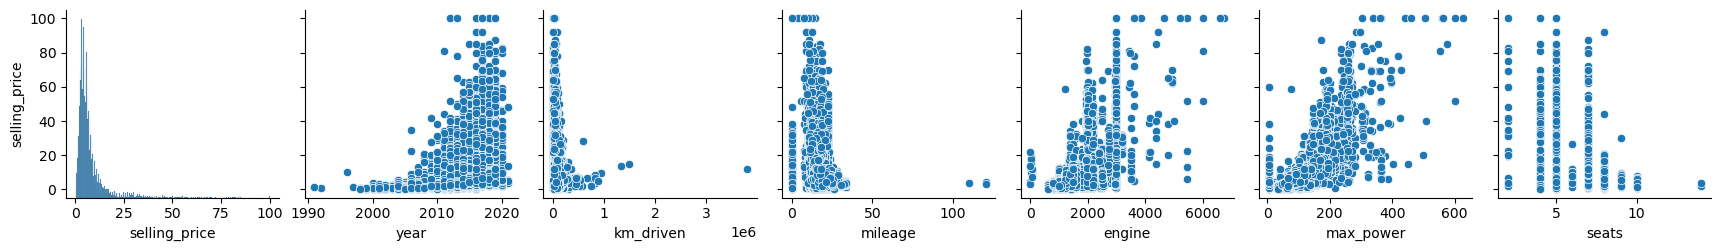

In [20]:
plt.figure(figsize=(10,8))
sns.pairplot(df_numeric, y_vars=["selling_price"])

In [21]:
df['make'] = df.full_name.apply(lambda x:x.split()[0])
df['model'] = df.full_name.apply(lambda x: " ".join(x.split()[1:]))

In [22]:
df = df.drop("full_name", axis=1)

In [23]:
df.head()

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model
0,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti,Alto Std
1,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai,Grand i10 Asta
2,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai,i20 Asta
3,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti,Alto K10 2010-2014 VXI
4,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford,Ecosport 2015-2021 1.5 TDCi Titanium BSIV


In [24]:
df.describe(include='object').T

,count,unique,top,freq
seller_type,19980,3,Dealer,11973
fuel_type,19980,5,Diesel,9817
transmission_type,19980,2,Manual,16029
make,19980,42,Maruti,5650
model,19980,3321,Swift Dzire VDI,210


<Axes: title={'center': 'transmission_type count'}, xlabel='transmission_type'>

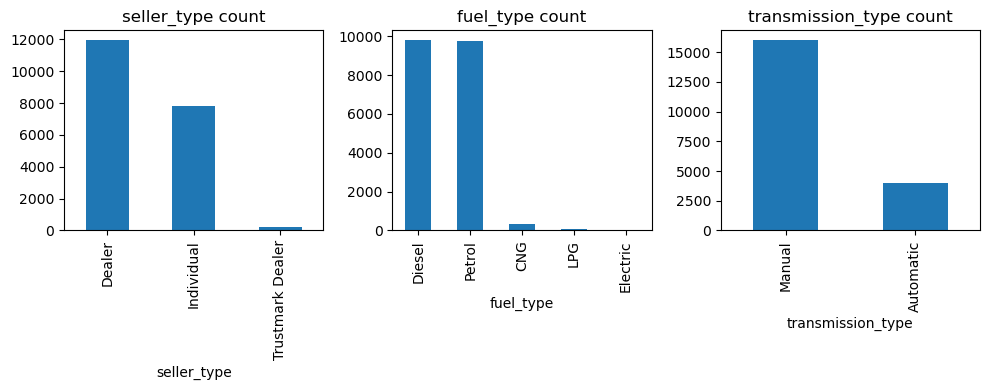

In [25]:
plt.figure(figsize=(10, 4), tight_layout=True)

plt.subplot(1, 3, 1)
plt.title('seller_type count')
df['seller_type'].value_counts().plot(kind='bar')


plt.subplot(1, 3, 2)
plt.title('fuel_type count')
df['fuel_type'].value_counts().plot(kind='bar')


plt.subplot(1, 3, 3)
plt.title('transmission_type count')
df['transmission_type'].value_counts().plot(kind='bar')


<Axes: title={'center': 'top 20 makes'}, xlabel='make'>

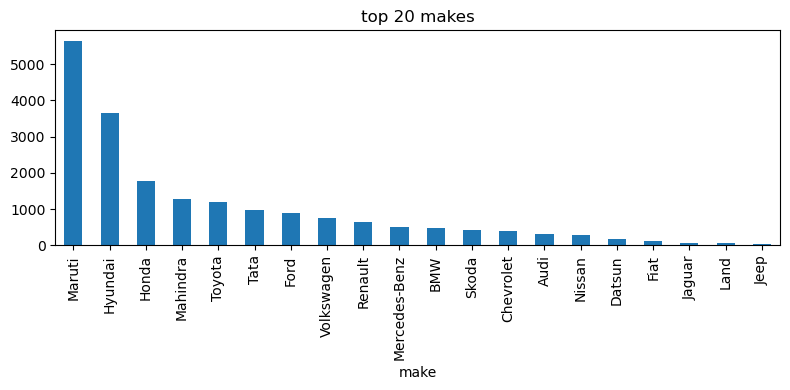

In [26]:
plt.figure(figsize=(8, 4), tight_layout=True)
plt.title("top 20 makes")
df['make'].value_counts()[:20].plot(kind='bar')

<Axes: title={'center': 'top 20 models'}, xlabel='model'>

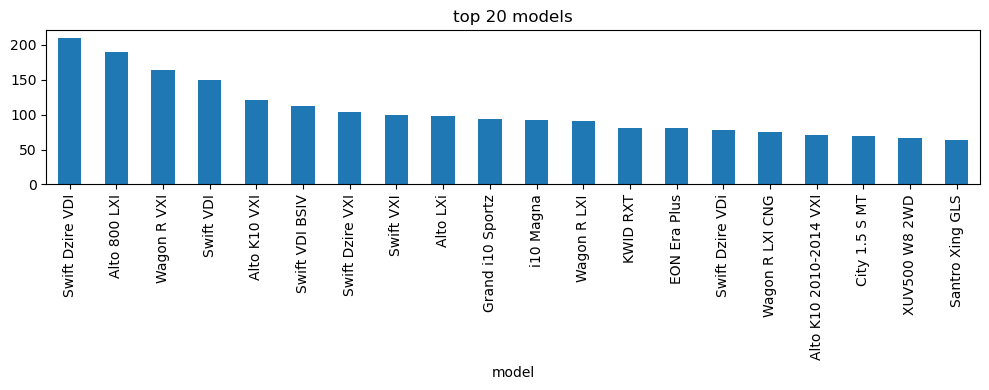

In [27]:
plt.figure(figsize=(10, 4), tight_layout=True)
plt.title("top 20 models")
df['model'].value_counts()[:20].plot(kind='bar')

<Axes: title={'center': 'selling price of top 15 make and model cards'}, ylabel='make,model'>

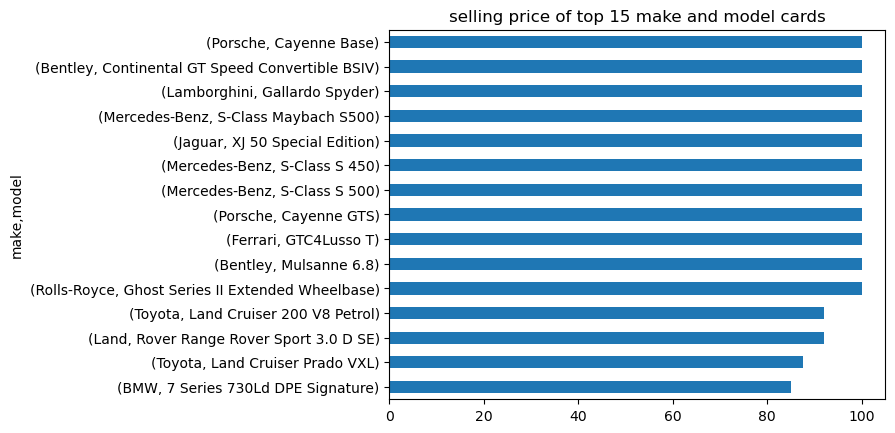

In [28]:
plt.title("selling price of top 15 make and model cards")
df.groupby(['make', 'model'])[ 'selling_price'].max().sort_values()[-15:].plot(kind='barh', )

### seller_type

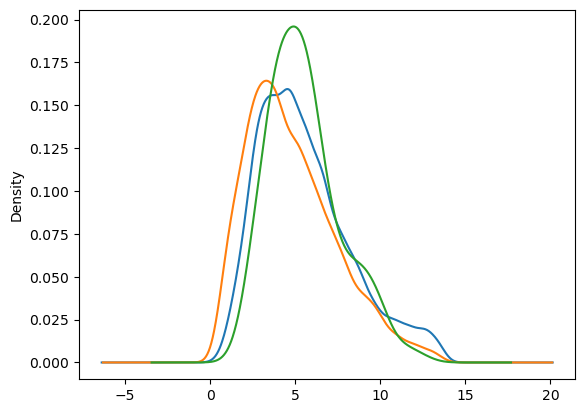

In [29]:
df.loc[df.selling_price<=df.selling_price.quantile(0.9)].groupby('seller_type')['selling_price'].plot.density();

* Looks like for different seller type, the selling price distrubution is not very different. 
* Hence one intuition that can be developed from this plot is that the seller_type variable will not turn out to be very important for the ML model. 

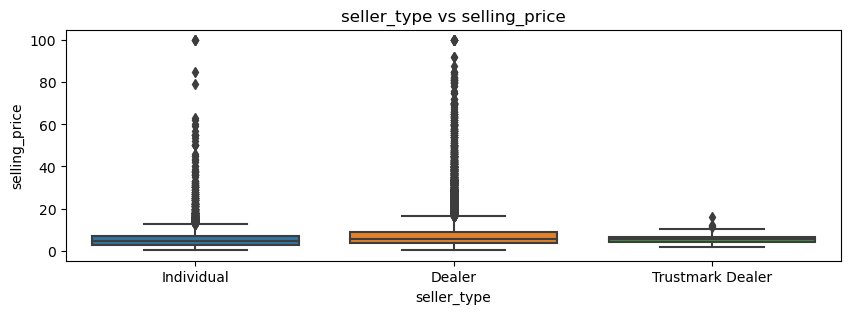

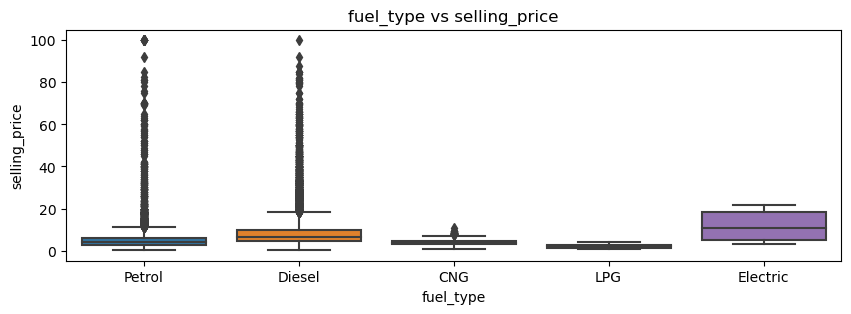

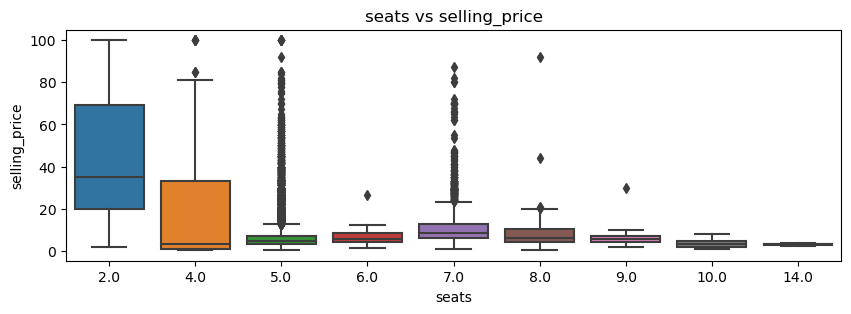

In [30]:
for col in ['seller_type', 'fuel_type', 'seats']:
    plt.figure(figsize=(10,3))
    sns.boxplot(y='selling_price',x=col, data=df)
    plt.title(f'{col} vs selling_price')
    plt.show()

In [31]:
# for better visualization lake log

In [32]:
df['selling_price_log'] = np.log(df.selling_price.values)

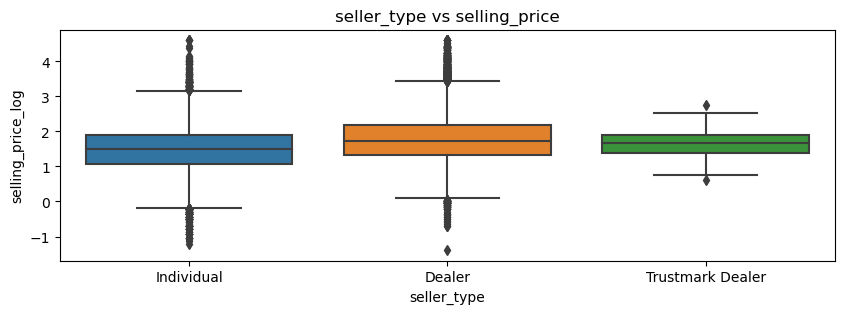

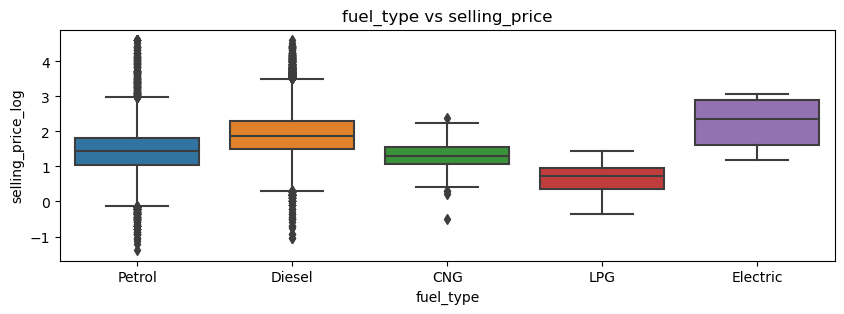

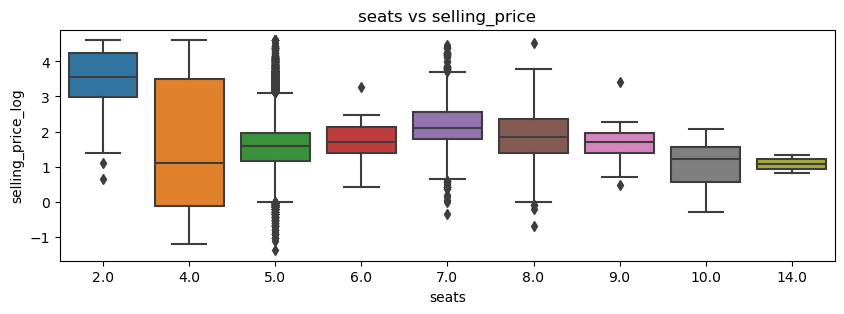

In [33]:
for col in ['seller_type', 'fuel_type', 'seats']:
    plt.figure(figsize=(10,3))
    sns.boxplot(y='selling_price_log',x=col, data=df)
    plt.title(f'{col} vs selling_price')
    plt.show()

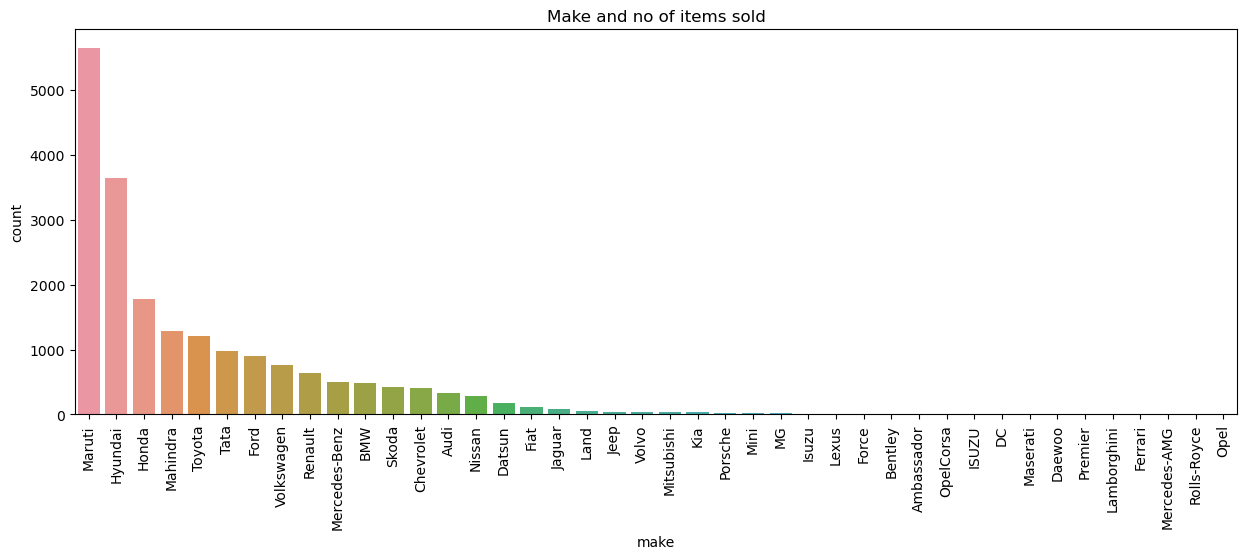

In [34]:
# counts for dfitterent make
plt.figure(figsize=(15,5))
sns.countplot(x='make', data=df, order = df['make'].value_counts().index)
plt.xticks(rotation=90);
plt.title("Make and no of items sold")
plt.show()

### How is "make" related to the selling price?

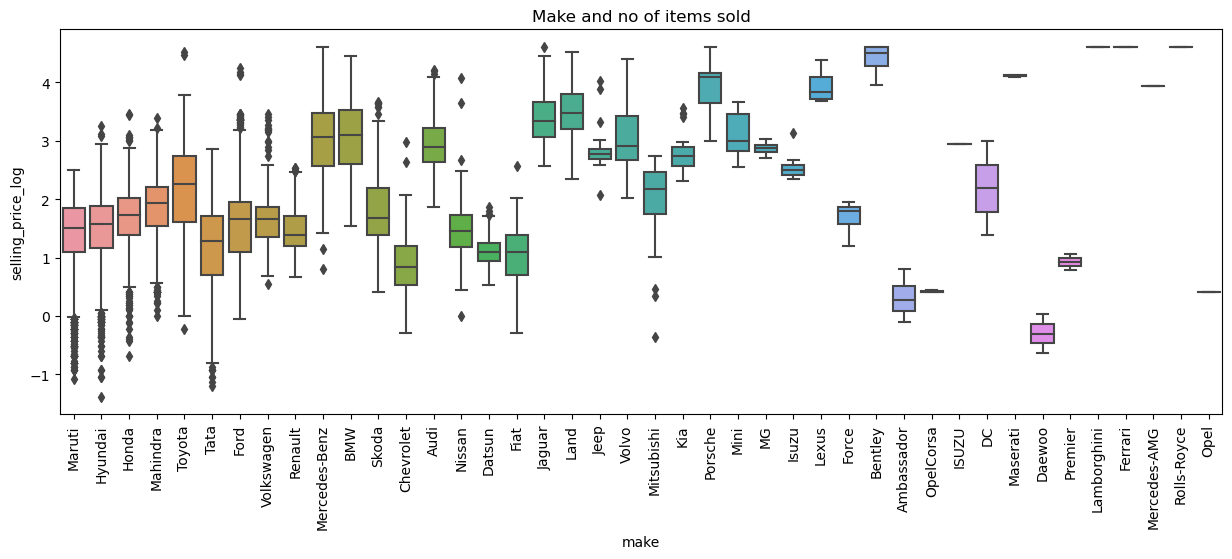

In [35]:
# counts for dfitterent make
plt.figure(figsize=(15,5))
sns.boxplot(y ='selling_price_log', x='make', data=df, order = df['make'].value_counts().index)
plt.xticks(rotation=90);
plt.title("Make and no of items sold")
plt.show()

# Categorical Encoding

In [37]:
transmission_dummy = pd.get_dummies(df["transmission_type"])
df = pd.concat([df, transmission_dummy], axis=1)
df = df.drop(["transmission_type", "Automatic"], axis=1)
df = df.rename(columns={"Manual": "transmission_type"})
df.sample(frac=1).head(2)



,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,make,model,selling_price_log,transmission_type
4423,4.0,2013.0,Individual,120000,Petrol,15.04,1598.0,103.6,5.0,Volkswagen,Vento Petrol Comfortline,1.386294,True
94,4.8,2017.0,Individual,30000,Petrol,18.16,1196.0,86.8,5.0,Ford,Aspire 1.2 Ti-VCT Titanium Opt,1.568616,True


In [42]:
fuel_type_dummy = pd.get_dummies(df["fuel_type"], prefix="seats")
fuel_type_dummy.sample(frac=1).head(2)

,seats_CNG,seats_Diesel,seats_Electric,seats_LPG,seats_Petrol
8919,False,True,False,False,False
18530,False,False,False,False,True


In [44]:
fuel_type_dummy = fuel_type_dummy[fuel_type_dummy.columns[1:]]
fuel_type_dummy.head(2)

,seats_Electric,seats_LPG,seats_Petrol
0,False,False,True
1,False,False,True


In [47]:
encoded_make = df.groupby('make')['selling_price'].transform('mean')
encoded_make

0         4.684721
1         5.374923
2         5.374923
3         4.684721
4         6.265275
           ...    
19975    11.236938
19976     4.684721
19977     7.541090
19978     7.303129
19979     5.988074
Name: selling_price, Length: 19980, dtype: float64

In [53]:
show_df = df[['make']].copy()
show_df['encoded_make'] = encoded_make
show_df = show_df.drop_duplicates()
print(len(show_df))
show_df.head()

42


,make,encoded_make
0,MARUTI,4.684721
1,HYUNDAI,5.374923
4,FORD,6.265275
9,MAHINDRA,7.303129
10,TATA,4.395415


In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [59]:
def merge_seats(x):
    if 2 <= x <= 4:
        return '2-4'
    elif x > 5:
        return '>5'
    else:
        return '5'

def preprocess(df):
    
    # outlier caping & 
    
    df = df.loc[df.mileage != 0].copy()
    outlier_theshold = df.selling_price.quantile(0.95)
    df.loc[df.selling_price > outlier_theshold, 'selling_price'] = outlier_theshold
    df['age'] = pd.to_datetime('now', utc=True).date().year - df['year']
    df['full_name'] = df['full_name'].str.upper()
    df['seats'] = df['seats'].apply(merge_seats)
    df.drop(columns=['year'])
    return df

def feature_engineering(df):
    
    # encoding, scaling
    df['make'] = df.full_name.apply(lambda x : x.split()[0])
    df['model'] = df.full_name.apply(lambda x : " ".join(x.split()[1:]))
    one_hot_encode_cols = ['seller_type', 'fuel_type', 'transmission_type', 'seats']
    for column in one_hot_encode_cols:
        df = pd.concat([df, pd.get_dummies(df[column]).iloc[: , 1:]], axis=1)
    df.drop(columns=one_hot_encode_cols + ['full_name'], inplace=True)
    df['make'] = df.groupby('make')['selling_price'].transform('median')
    df['model'] = df.groupby('model')['selling_price'].transform('median')
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df

In [58]:
df = pd.read_csv('..\data\cars24-car-price.csv')
df = preprocess(df)
df = feature_engineering(df)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.184371,0.042522,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.207231,0.225975,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.207231,0.120277,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.184371,0.093549,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.224624,0.300085,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
